# Fuzzify and aggregate distance learning survey results

We start by importing required libraries

In [40]:
import csv

import numpy
from matplotlib import pyplot as plt

We tell Jupyter where to find the survey results

In [41]:
FILE_PATH = '../tram_residents.csv'

We start the processing by loading the responses. Each line in the CSV file contains the answers
of a single respondent. `csv.reader` automatically creates a Python tuple for each row.

In [42]:
respondents_answers_raw = []

with open(FILE_PATH, 'r') as fd_survey_results:
    csv_reader = csv.reader(fd_survey_results)
    csv_reader.__next__()
    for respondent_raw in csv_reader:
        respondents_answers_raw.append(respondent_raw)

Now we use the text-number maps to transform the answers of all respondents to a numerical form
This will create a `(degree_of_agreement, hesitance)` tuple for each aswer.

In [43]:
def answers_to_numbers(respondent_answers):
    num_questions = int(len(respondent_answers[1:]) / 2)
    answers = [respondent_answers[i*2+1] for i in range(num_questions)]
    hesitances = [respondent_answers[i*2+2] for i in range(num_questions)]
    answers = list(map(int, answers))
    hesitances = list(map(int, hesitances))
    answers = list(zip(answers, hesitances))
    return answers

respondents_answers = list(map(answers_to_numbers, respondents_answers_raw))

for r in respondents_answers:
    print(r)

[(5, 0), (4, 2), (5, 1), (5, 1), (5, 0)]
[(4, 0), (4, 1), (4, 1), (5, 0), (5, 0)]
[(5, 1), (5, 2), (4, 2), (4, 1), (4, 1)]
[(3, 0), (2, 2), (4, 0), (4, 0), (5, 0)]
[(3, 0), (3, 0), (2, 0), (2, 0), (3, 0)]
[(5, 1), (5, 2), (4, 1), (4, 1), (5, 1)]
[(2, 2), (4, 0), (2, 2), (2, 2), (1, 1)]
[(4, 1), (2, 0), (1, 1), (1, 0), (5, 0)]
[(4, 0), (4, 0), (4, 0), (4, 0), (5, 0)]
[(3, 0), (3, 0), (2, 0), (2, 0), (4, 0)]
[(3, 0), (2, 2), (3, 0), (1, 0), (2, 1)]
[(2, 1), (1, 2), (3, 0), (2, 1), (3, 0)]
[(5, 0), (4, 1), (5, 0), (4, 0), (5, 1)]
[(4, 1), (4, 1), (4, 1), (4, 1), (4, 0)]
[(5, 0), (3, 0), (2, 0), (2, 0), (4, 0)]
[(4, 1), (3, 0), (4, 1), (5, 1), (4, 0)]
[(1, 1), (2, 2), (3, 2), (3, 2), (1, 1)]
[(3, 0), (4, 1), (1, 2), (1, 0), (3, 0)]
[(4, 2), (2, 1), (1, 1), (1, 1), (2, 1)]
[(2, 1), (2, 2), (5, 2), (5, 2), (3, 0)]
[(4, 0), (4, 0), (4, 0), (5, 0), (5, 0)]
[(4, 0), (4, 0), (4, 0), (4, 0), (4, 0)]
[(2, 1), (4, 1), (2, 1), (3, 1), (2, 2)]
[(5, 0), (2, 0), (3, 0), (2, 0), (4, 0)]
[(3, 0), (2, 1),

We use the information about the degree of agreement and hesitance to construct a triangular
fuzzy number for each response. The degree of agreement will be used as the core of each number.
We calculate the support interval by subtracting/adding the level of hesitance from the core while
also making sure that the support won't go outside the \[1, 5\] interval:

We also calculate a the arithmetic average of all answers for each respondent.

In [44]:
def fuzzify_answer(answer):
    core = answer[0]
    spread = answer[1]
    left = max(1, core - spread)
    right = min(5, core + spread)
    return left, core, right

def get_mean(answers):
    core = numpy.mean([a[1] for a in answers]) # Simply the mean of all cores
    left = numpy.mean([a[0] for a in answers]) # Simply the mean of all left borders of all supports
    right = numpy.mean([a[2] for a in answers]) # Simply the mean of all right borders of all supports
    return left, core, right

respondents_answers_fuzzy = list(map(lambda r: list(map(fuzzify_answer, r)), respondents_answers))
respondents_means = list(map(get_mean, respondents_answers_fuzzy))

for i, r in enumerate(respondents_answers):
    print(i, 'Answers:', r, 'Mean:', respondents_means[i])

0 Answers: [(5, 0), (4, 2), (5, 1), (5, 1), (5, 0)] Mean: (4.0, 4.8, 5.0)
1 Answers: [(4, 0), (4, 1), (4, 1), (5, 0), (5, 0)] Mean: (4.0, 4.4, 4.8)
2 Answers: [(5, 1), (5, 2), (4, 2), (4, 1), (4, 1)] Mean: (3.0, 4.4, 5.0)
3 Answers: [(3, 0), (2, 2), (4, 0), (4, 0), (5, 0)] Mean: (3.4, 3.6, 4.0)
4 Answers: [(3, 0), (3, 0), (2, 0), (2, 0), (3, 0)] Mean: (2.6, 2.6, 2.6)
5 Answers: [(5, 1), (5, 2), (4, 1), (4, 1), (5, 1)] Mean: (3.4, 4.6, 5.0)
6 Answers: [(2, 2), (4, 0), (2, 2), (2, 2), (1, 1)] Mean: (1.6, 2.2, 3.6)
7 Answers: [(4, 1), (2, 0), (1, 1), (1, 0), (5, 0)] Mean: (2.4, 2.6, 3.0)
8 Answers: [(4, 0), (4, 0), (4, 0), (4, 0), (5, 0)] Mean: (4.2, 4.2, 4.2)
9 Answers: [(3, 0), (3, 0), (2, 0), (2, 0), (4, 0)] Mean: (2.8, 2.8, 2.8)
10 Answers: [(3, 0), (2, 2), (3, 0), (1, 0), (2, 1)] Mean: (1.8, 2.2, 2.8)
11 Answers: [(2, 1), (1, 2), (3, 0), (2, 1), (3, 0)] Mean: (1.8, 2.2, 3.0)
12 Answers: [(5, 0), (4, 1), (5, 0), (4, 0), (5, 1)] Mean: (4.2, 4.6, 4.8)
13 Answers: [(4, 1), (4, 1), (4, 1)

We want to see how the answers of each respondent look in a plot:

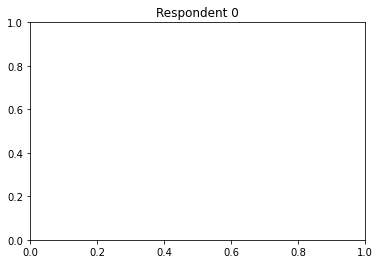

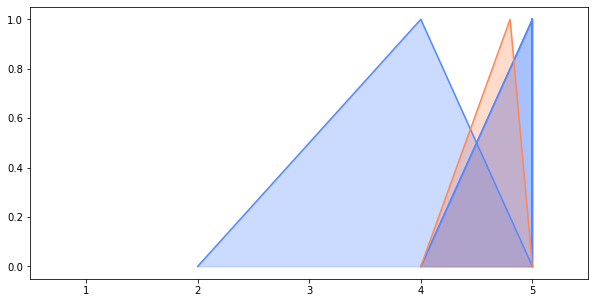

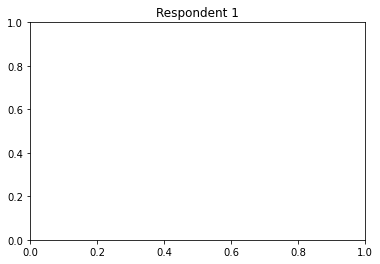

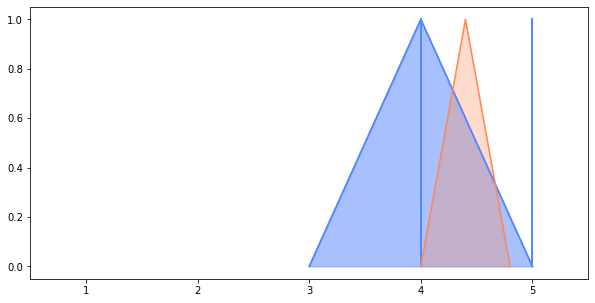

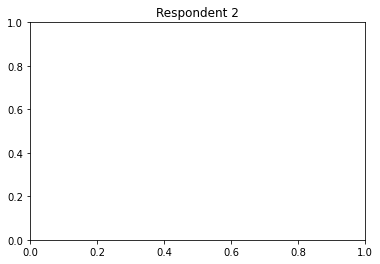

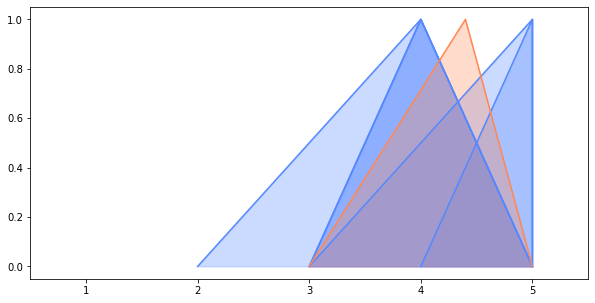

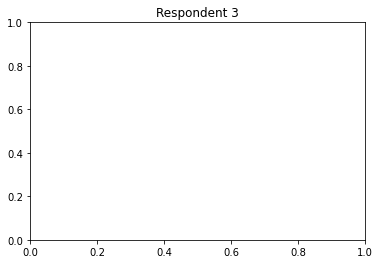

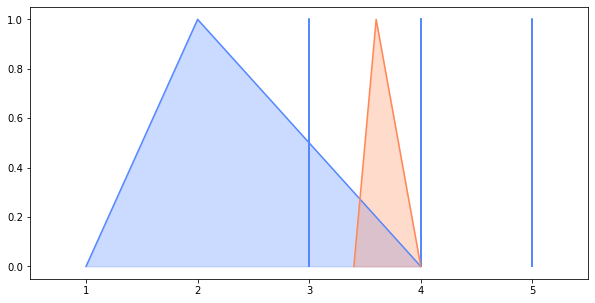

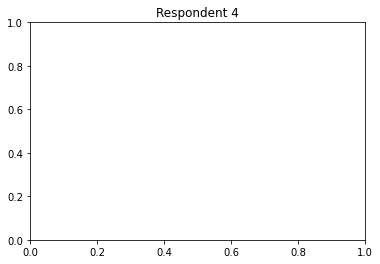

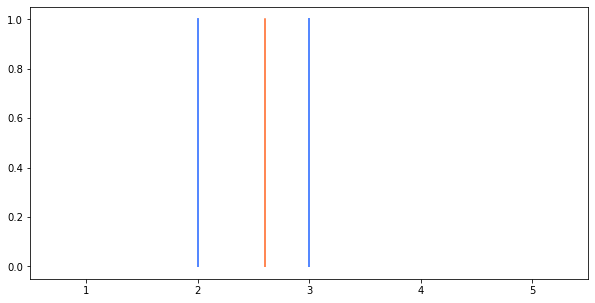

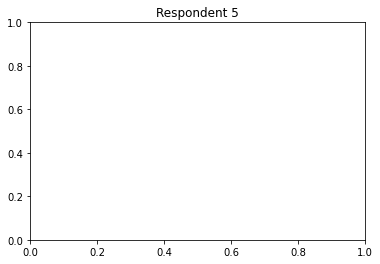

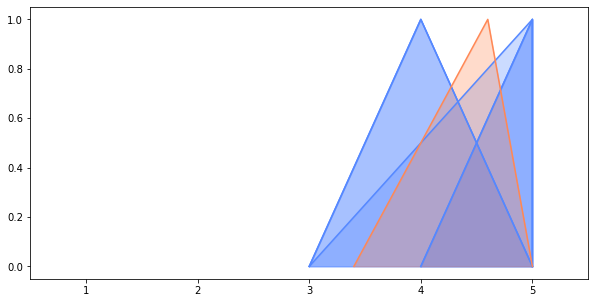

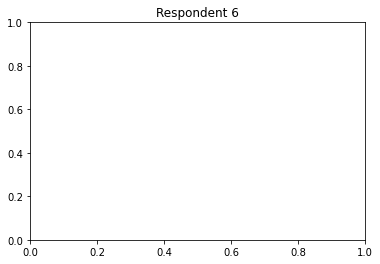

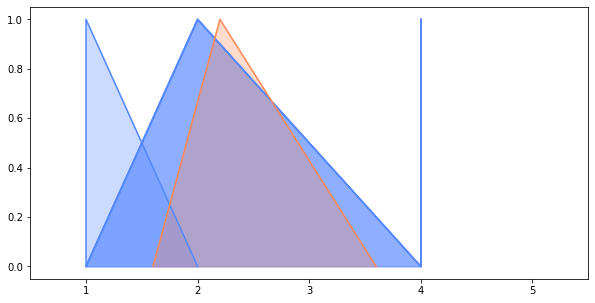

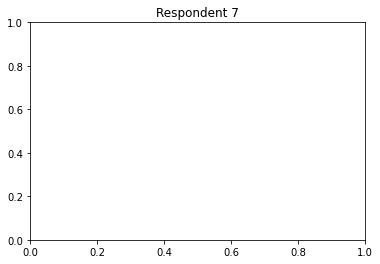

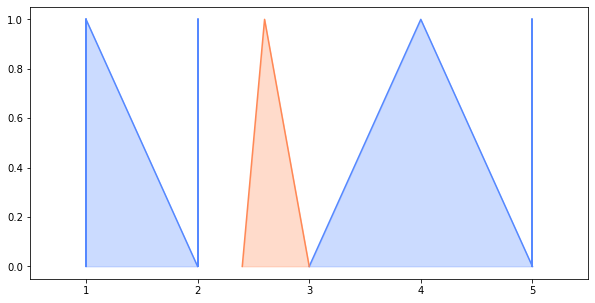

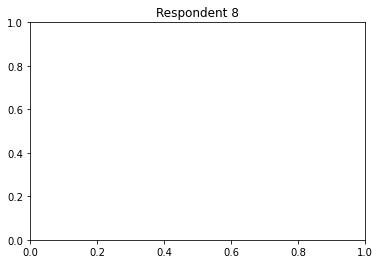

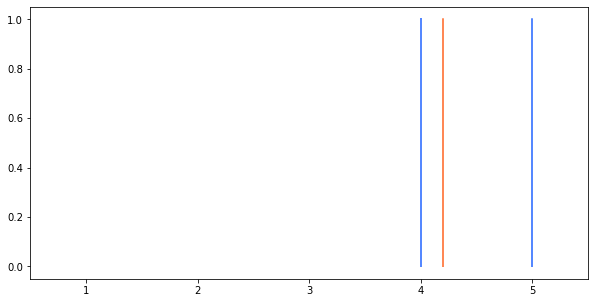

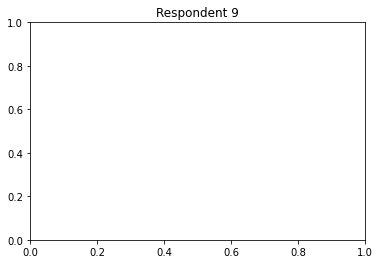

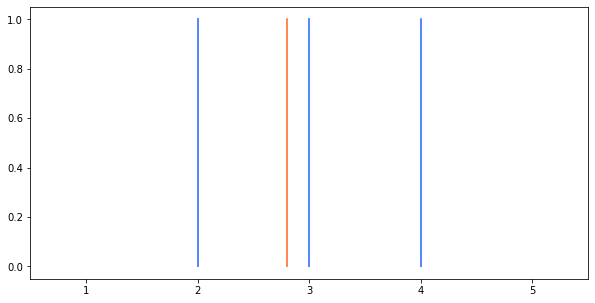

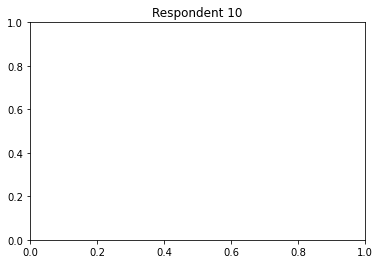

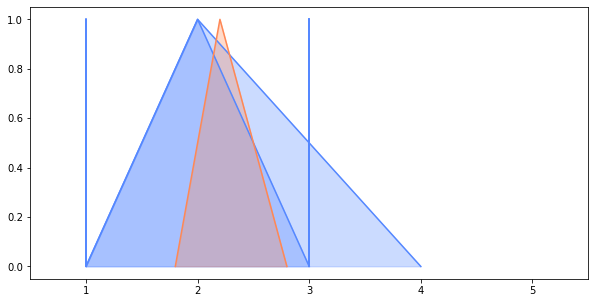

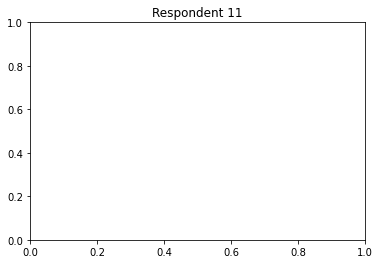

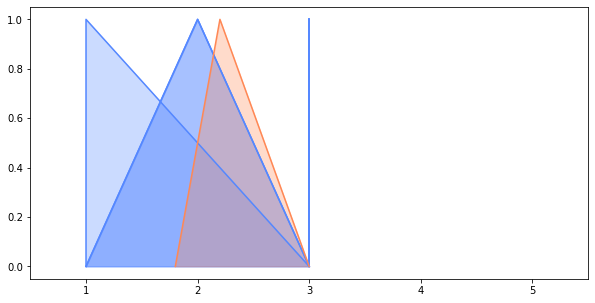

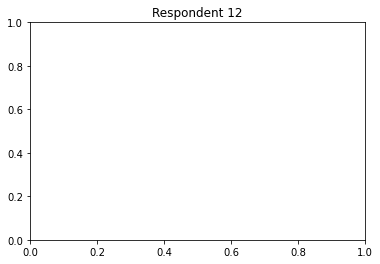

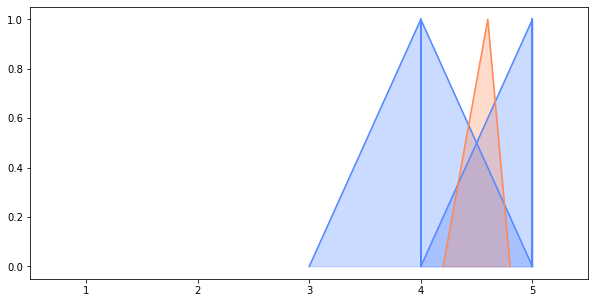

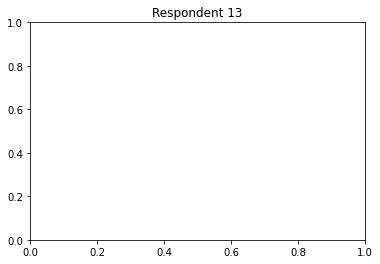

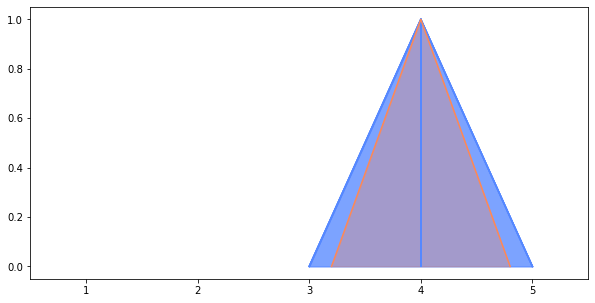

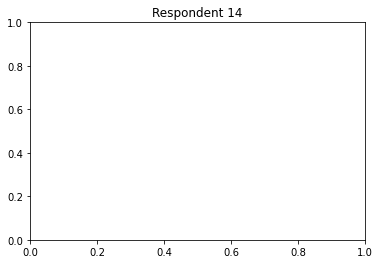

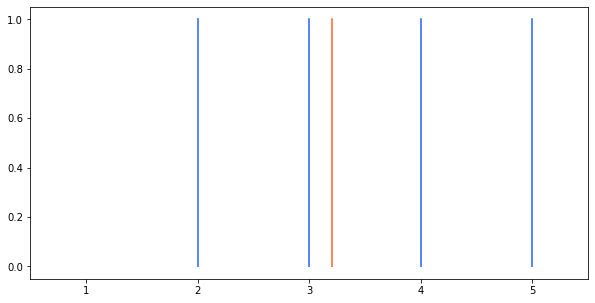

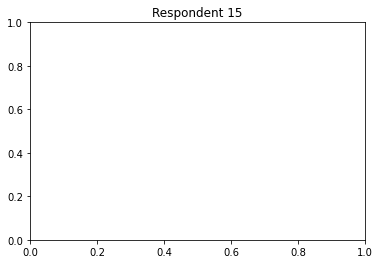

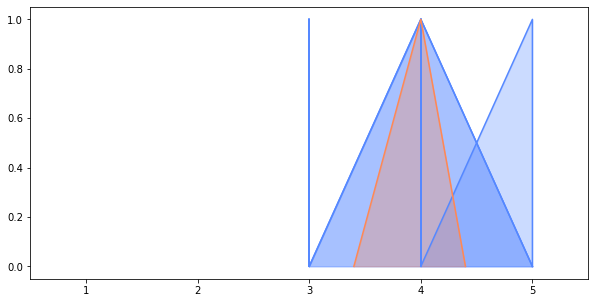

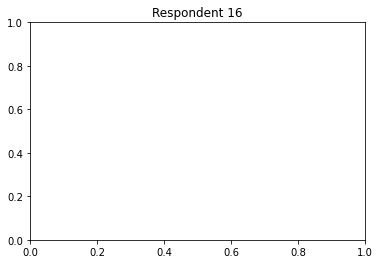

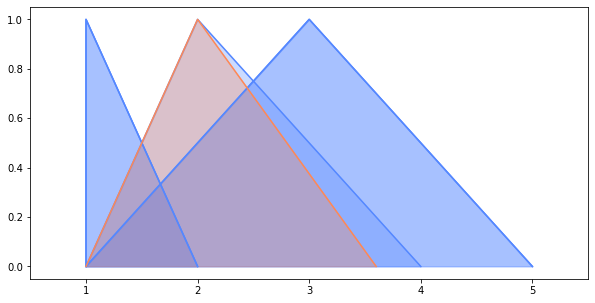

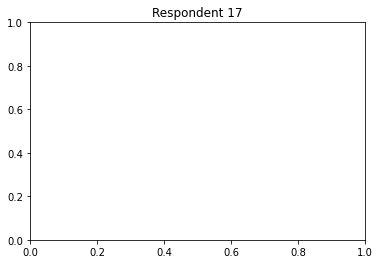

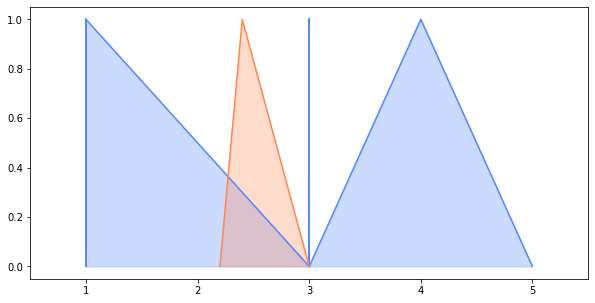

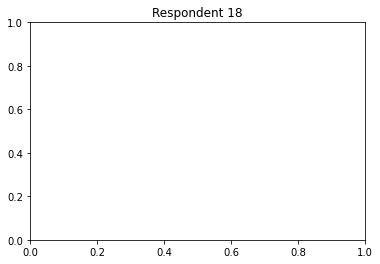

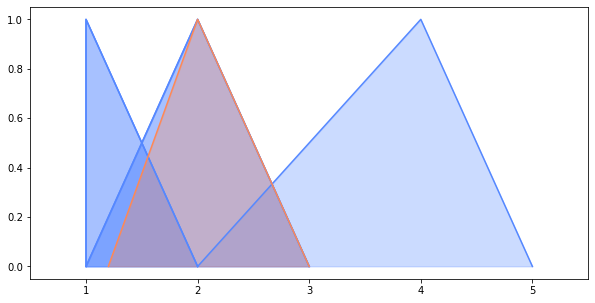

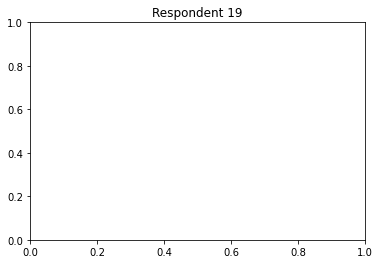

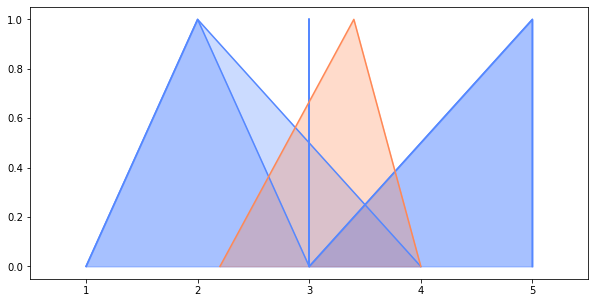

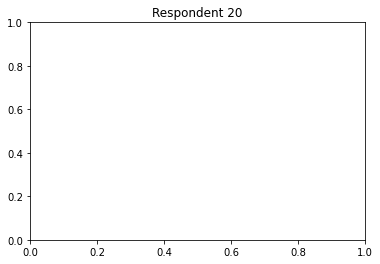

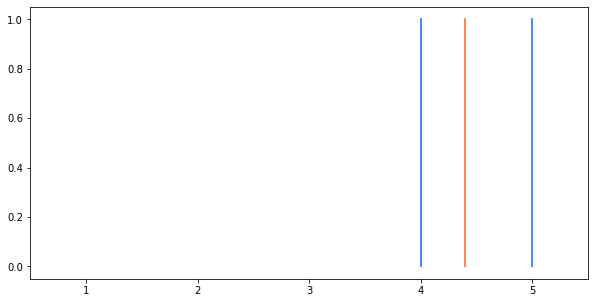

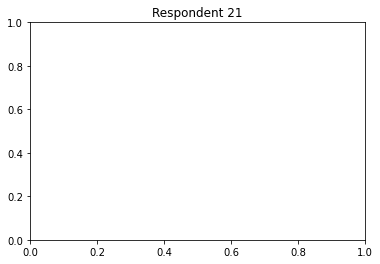

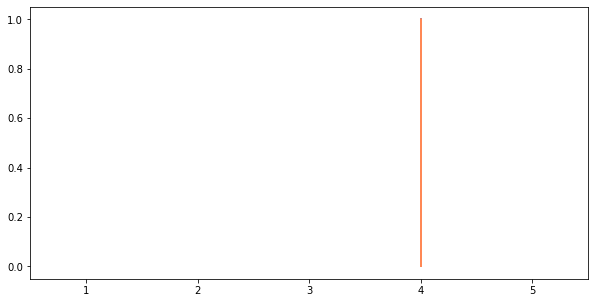

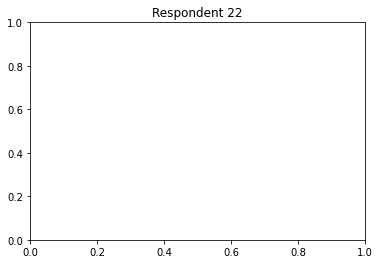

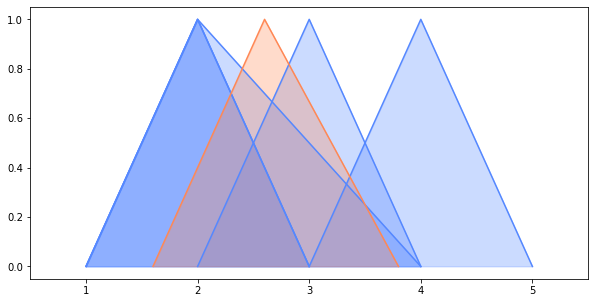

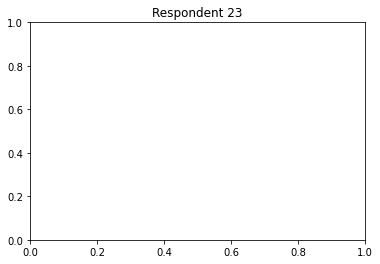

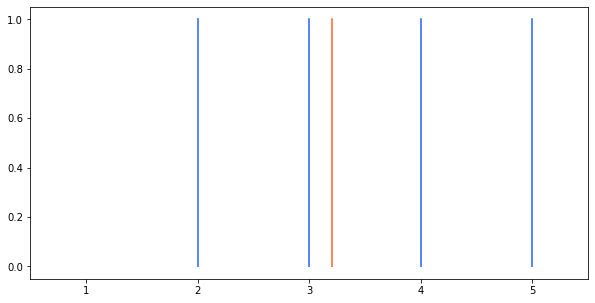

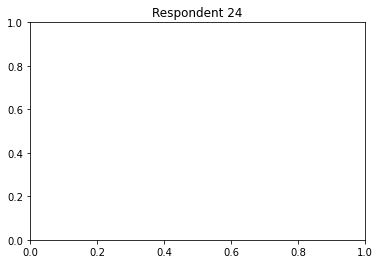

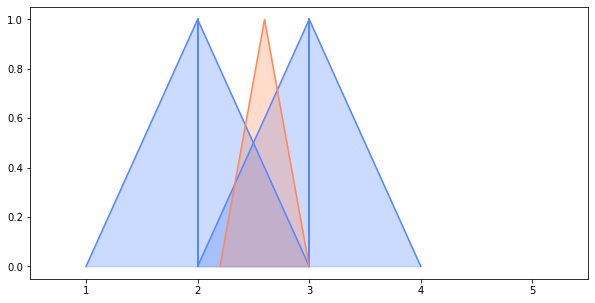

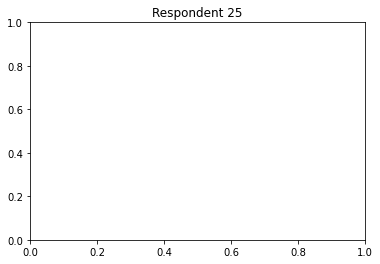

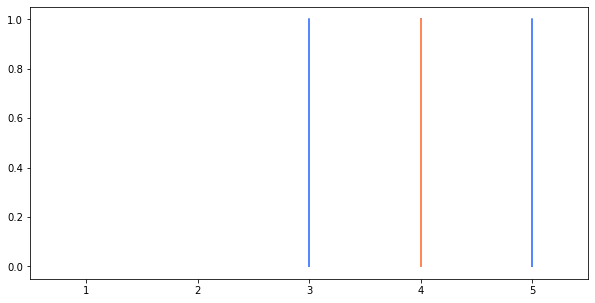

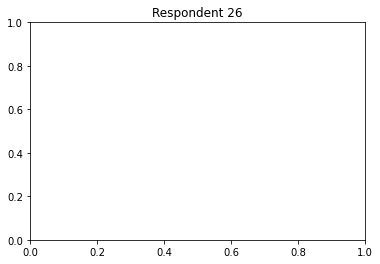

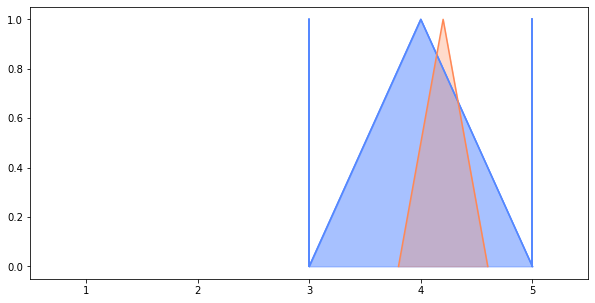

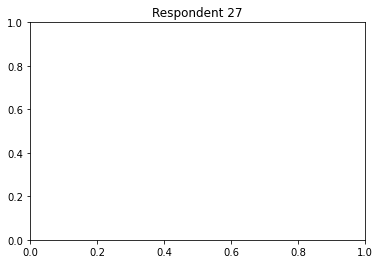

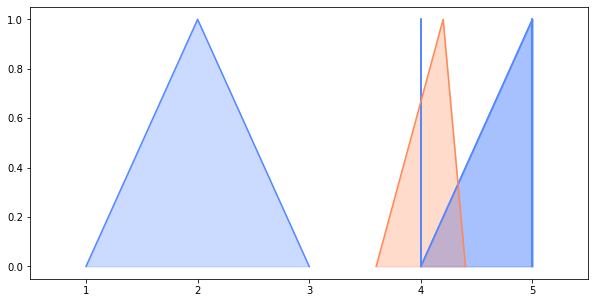

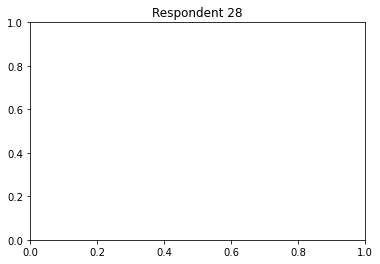

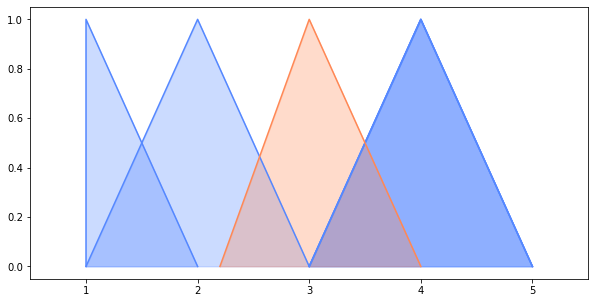

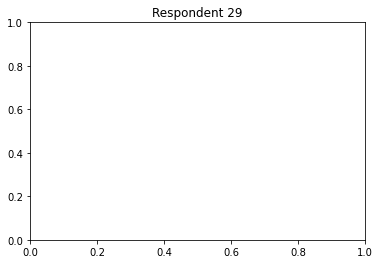

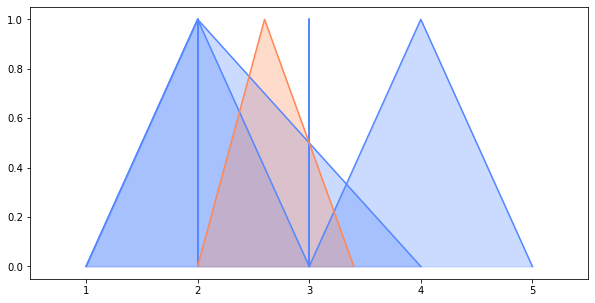

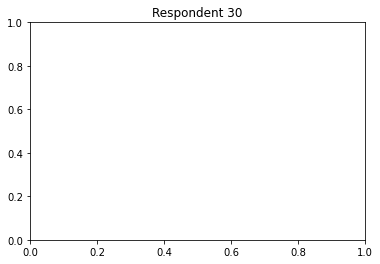

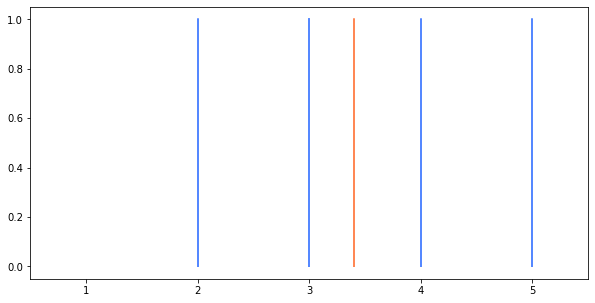

In [45]:
for i, answers in enumerate(respondents_answers_fuzzy):
    plt.title('Respondent %d' % i)
    plt.figure(figsize=(10, 5))
    for answer in answers:
        plt.plot(answer, [0, 1, 0], color='#5588ff', label=str(answer))
        plt.fill_between(answer, [0, 1, 0], color='#5588ff', alpha=0.3)
    plt.plot(respondents_means[i], [0, 1, 0], color='#ff8855', label=str(respondents_means[i]))
    plt.fill_between(respondents_means[i], [0, 1, 0], color='#ff8855', alpha=0.3)
    plt.xlim(0.5, 5.5)
    # plt.legend()
    plt.show()
    plt.close()

## Conformity with positive or negative opinion

Next, we define a linguistice variable `opinion` that can assume one of two values: `positive` and
`negative`, both of which are fuzzy numbers. Their exact shape is determined by the `POS_A` and
`POS_B` constants.

In [46]:
NEG_A = 2
NEG_B = 4

POS_A = NEG_B
POS_B = NEG_A

def conformity_negative(answer_fuzzy, neg_a, neg_b):
    if answer_fuzzy[1] >= neg_b:
        possibility = 1
    elif answer_fuzzy[2] <= neg_a:
        possibility = 0
    else:
        x = (neg_a * answer_fuzzy[1] - answer_fuzzy[2] * neg_b) / \
            (neg_a - neg_b + answer_fuzzy[1] - answer_fuzzy[2])
        possibility = (x - neg_a) / (neg_b - neg_a)
    return possibility

def conformity_positive(answer_fuzzy, pos_a, pos_b):
    answer_fuzzy_rev = (6 - answer_fuzzy[2], 6 - answer_fuzzy[1], 6 - answer_fuzzy[0])
    return conformity_negative(answer_fuzzy_rev, pos_b, pos_a)

The plots show both values of the `opinion` variable: `positive` in light green and `negative` in
light red. We also show the mean answer of a given respondent in orange. Finally, green horizontal
line represents the degree of conformity of the answer with the value `positive opinion` and
the red line shows the degree of conformity with the value `negative opinion`.

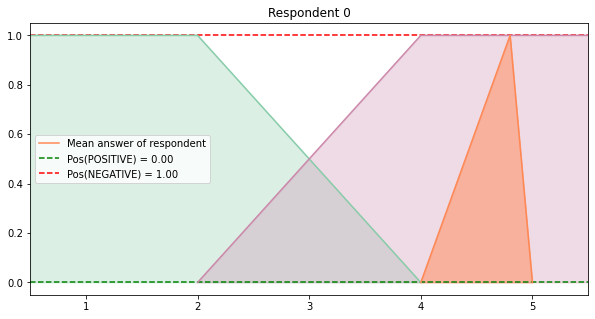

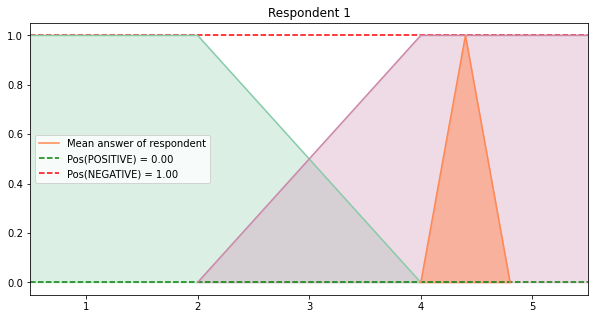

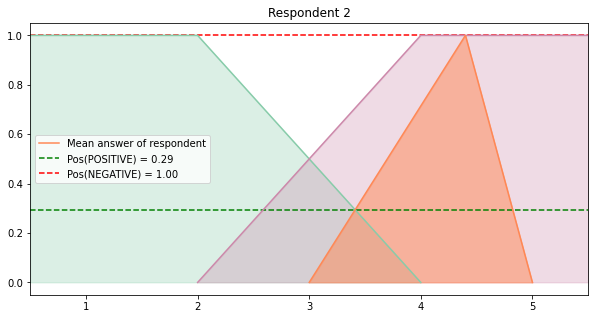

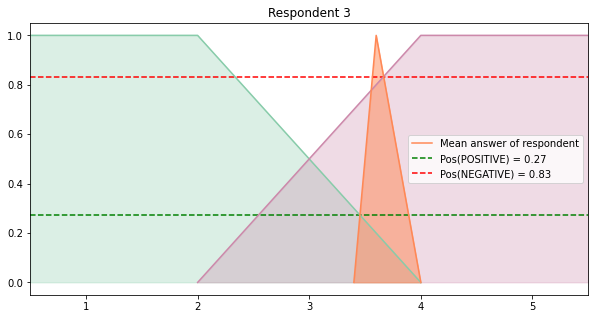

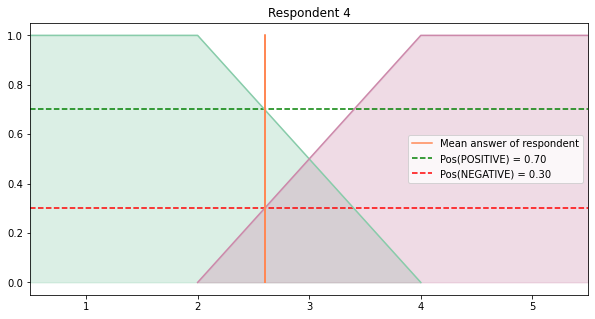

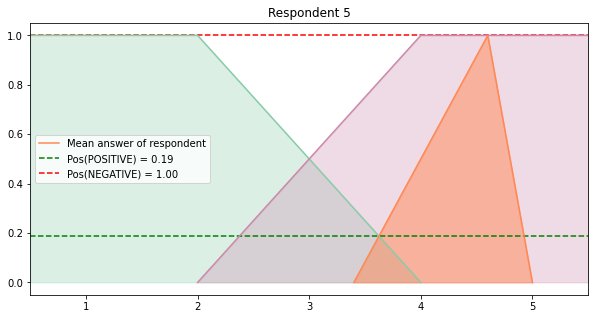

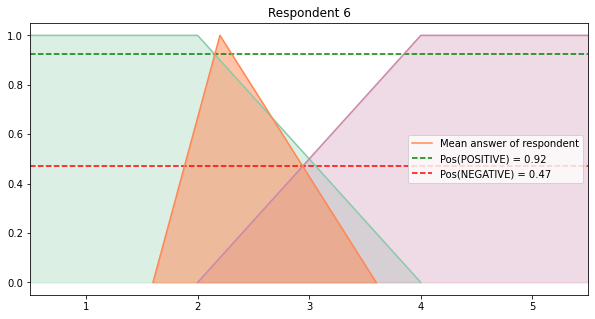

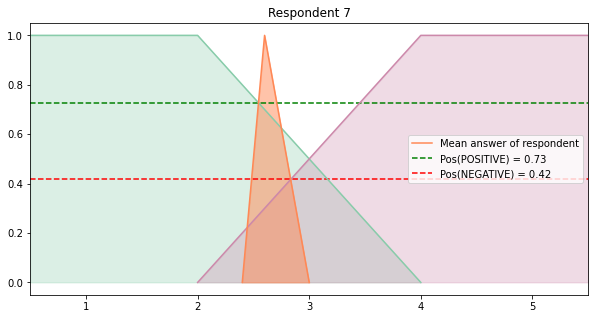

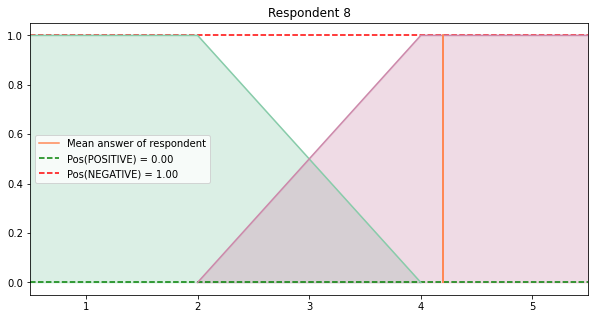

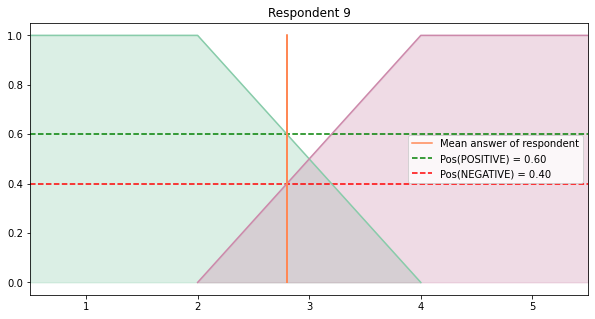

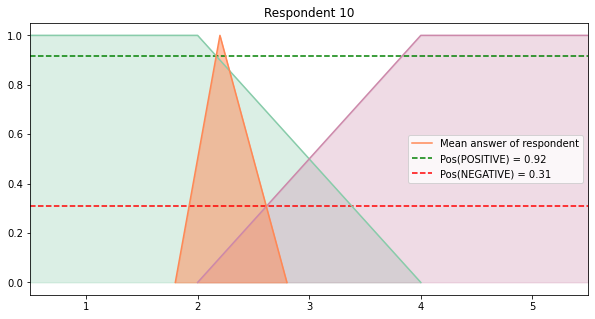

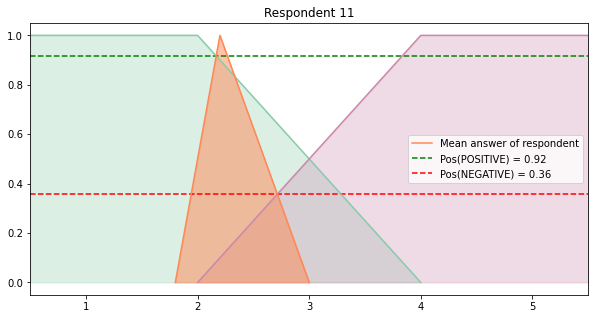

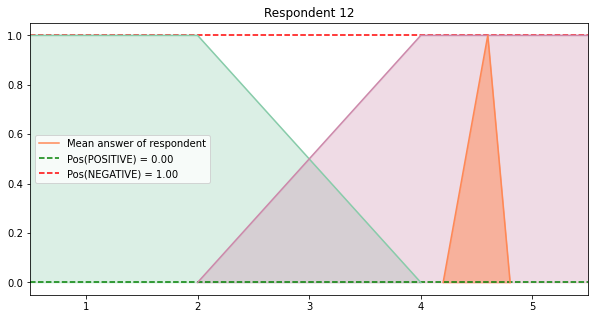

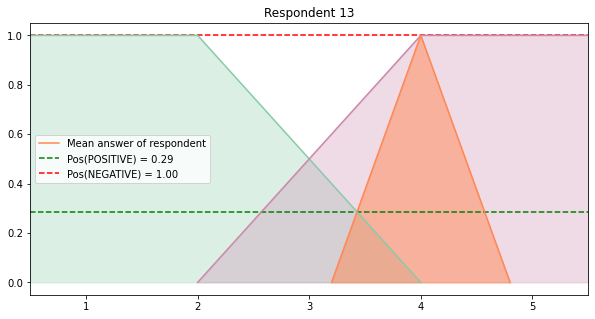

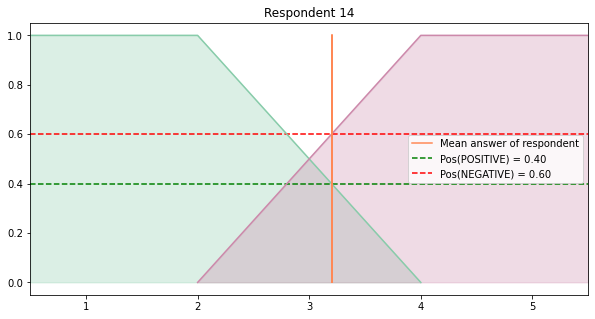

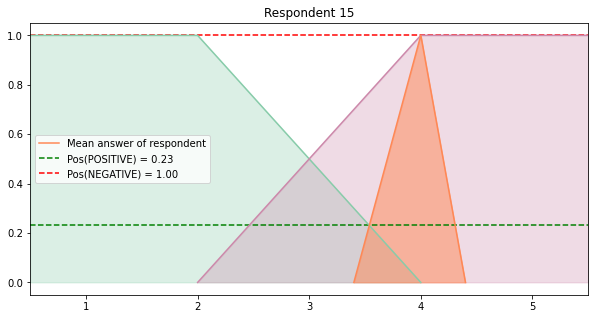

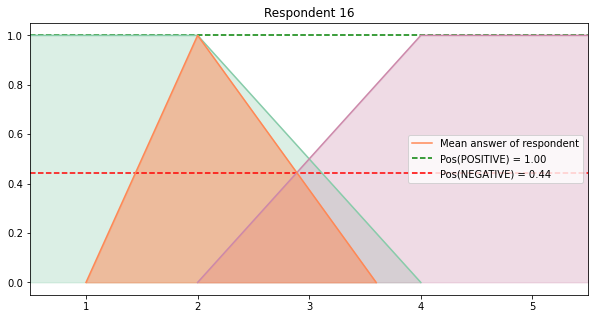

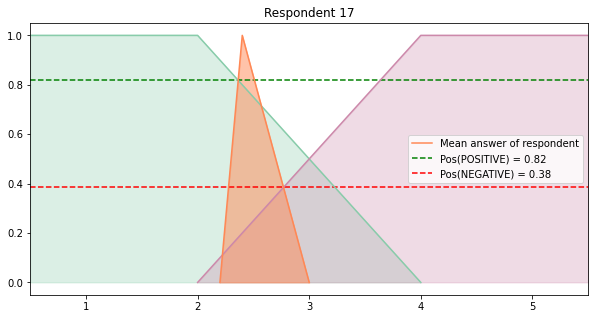

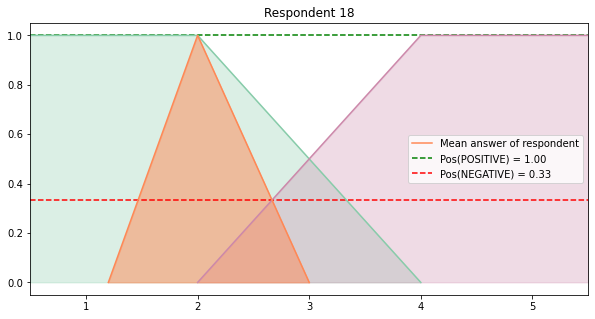

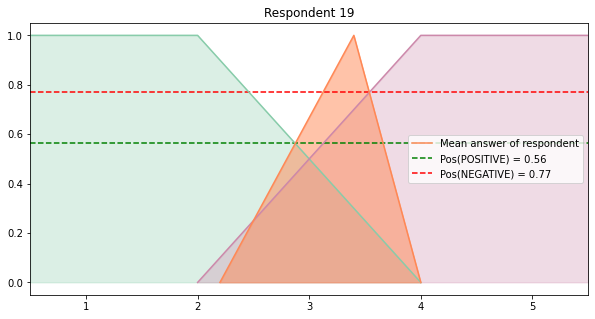

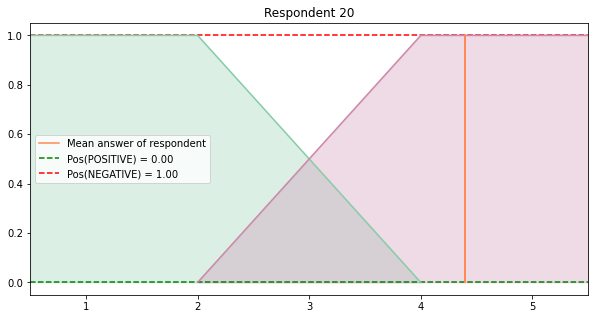

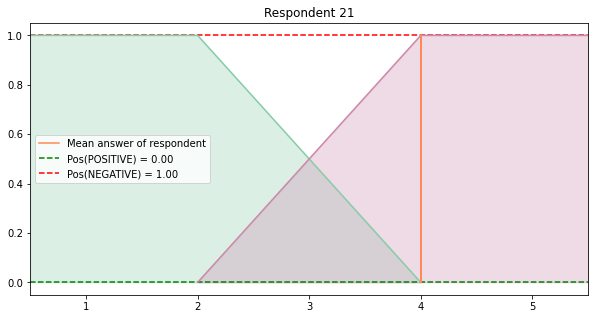

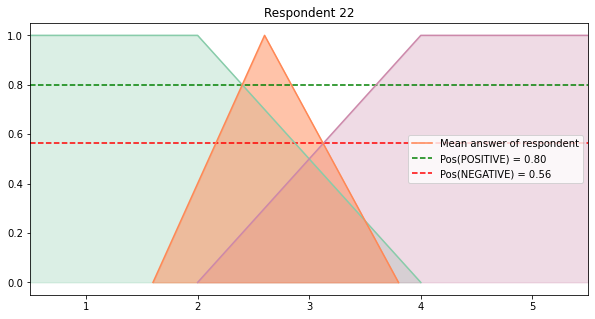

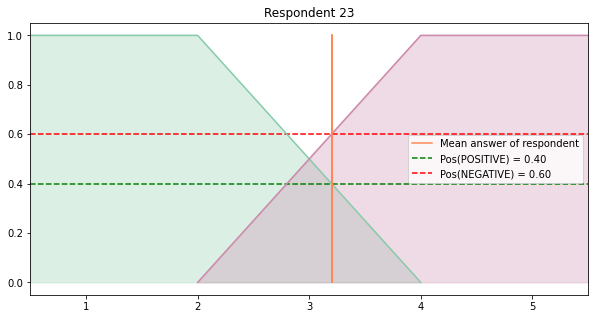

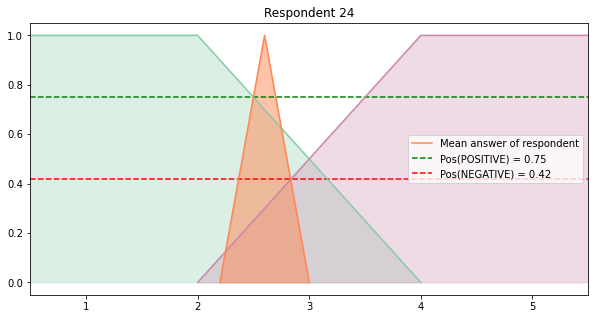

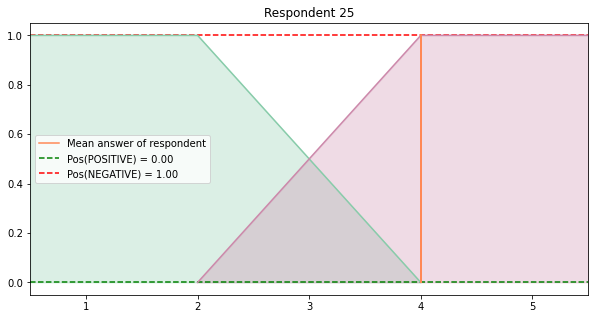

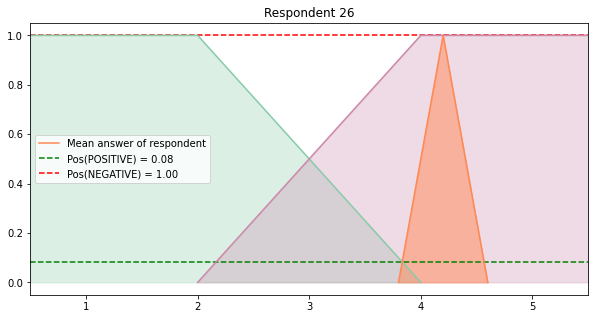

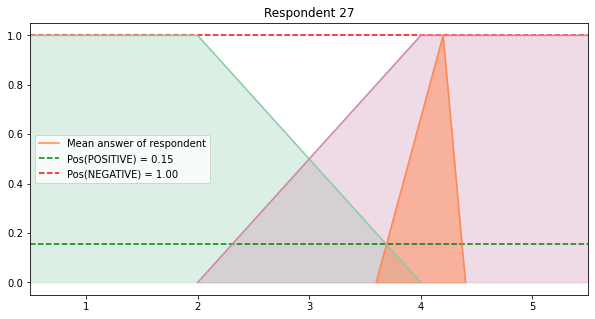

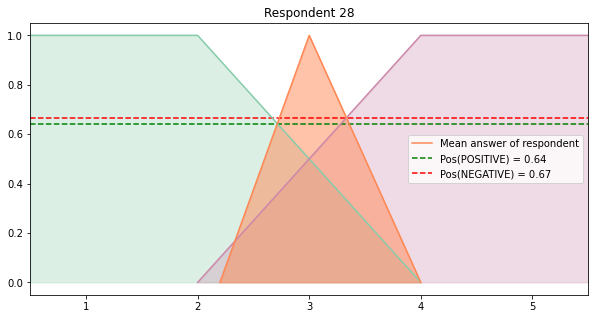

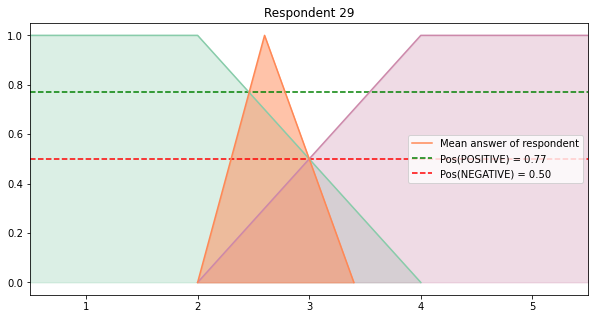

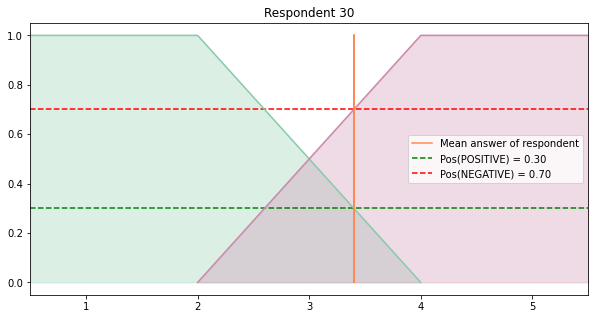

In [47]:
conformities_positive = []
conformities_negative = []

for i, mean_aswer in enumerate(respondents_means):
    plt.figure(figsize=(10, 5))
    conformity_pos = conformity_positive(mean_aswer, POS_A, POS_B)
    conformities_positive.append(conformity_pos)
    conformity_neg = conformity_negative(mean_aswer, NEG_A, NEG_B)
    conformities_negative.append(conformity_neg)
    plt.title('Respondent %d' % i)
    plt.xlim(0.5, 5.5)

    # Positive opinion
    plt.plot([0.5, POS_B, POS_A], [1, 1, 0], color='#88ccaa')
    plt.fill_between([0.5, POS_B, POS_A], [1, 1, 0], color='#88ccaa', alpha=0.3)
    plt.hlines([conformity_pos], xmin=0.5, xmax=5.5,
        color='green', linestyles='--', label='Pos(POSITIVE) = %.2f' % conformity_pos)
    
    # Negative opinion
    plt.plot([NEG_A, NEG_B, 5.5], [0, 1, 1], color='#cc88aa')
    plt.fill_between([NEG_A, NEG_B, 5.5], [0, 1, 1], color='#cc88aa', alpha=0.3)
    plt.hlines([conformity_neg], xmin=0.5, xmax=5.5,
        color='red', linestyles='--', label='Pos(NEGATIVE) = %.2f' % conformity_neg)

    # Our answer
    plt.plot(mean_aswer, [0, 1, 0], color='#ff8855', label='Mean answer of respondent')
    plt.fill_between(mean_aswer, [0, 1, 0], color='#ff8855', alpha=0.5)

    plt.legend()
    plt.show()
    plt.close()

## Second level of aggregation

In [48]:
MOST_A = 0.5
MOST_B = 0.85

def most_of(a):
    if a <= MOST_A:
        degree = 0
    elif a >= MOST_B:
        degree = 1
    else:
        degree = (a - MOST_A) / (MOST_B - MOST_A)
    return degree

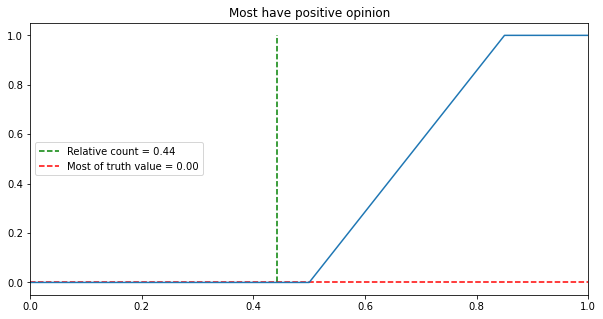

In [49]:
positive_count_rel = sum(conformities_positive) / len(conformities_positive)
positive_most_of_degree = most_of(positive_count_rel)

plt.figure(figsize=(10, 5))
plt.title('Most have positive opinion')
plt.plot([0, MOST_A, MOST_B, 1], [0, 0, 1, 1])
plt.xlim(0, 1)
plt.vlines(
    [positive_count_rel], ymin=0, ymax=1, color='green', linestyle='--',
    label='Relative count = %.2f' % positive_count_rel)
plt.hlines(
    [positive_most_of_degree], xmin=0, xmax=1, color='red', linestyle='--',
    label='Most of truth value = %.2f' % positive_most_of_degree)
plt.legend(loc='center left')
plt.show()

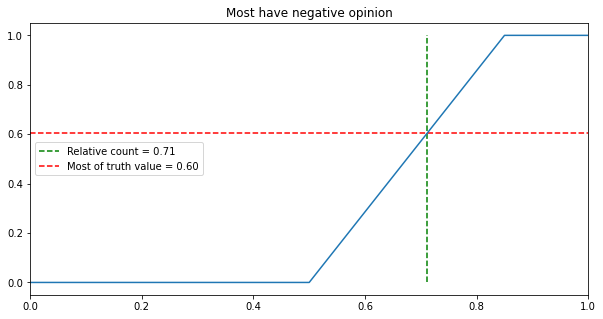

In [50]:
negative_count_rel = sum(conformities_negative) / len(conformities_negative)
negative_most_of_degree = most_of(negative_count_rel)

plt.figure(figsize=(10, 5))
plt.title('Most have negative opinion')
plt.plot([0, MOST_A, MOST_B, 1], [0, 0, 1, 1])
plt.xlim(0, 1)
plt.vlines(
    [negative_count_rel], ymin=0, ymax=1, color='green', linestyle='--',
    label='Relative count = %.2f' % negative_count_rel)
plt.hlines(
    [negative_most_of_degree], xmin=0, xmax=1, color='red', linestyle='--',
    label='Most of truth value = %.2f' % negative_most_of_degree)
plt.legend(loc='center left')
plt.show()